---

---

# ***About Author***

#### ***[JaberAlJ GitHub](https://github.com/JaberAlJ)***

---

---

# **Objective**

The core objective is to **support early intervention** by using machine learning models to predict a student’s academic outcome—whether they will:

- **Drop out**
- **Remain Enrolled**
- **Successfully Graduate**

This is framed as a **three-class classification problem** with a known class imbalance, offering real-world challenges for predictive modeling and education analytics.

---

---

# **Importing Libraries**
Import necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tools
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RFC

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

---

---

# **Dataset**

In [2]:
df = pd.read_csv('students_dropout_academic_success.csv')
df.sample(10)

Marital Status  Application mode  Application order  Course  \
2336               1                43                  1    9991   
4413               1                43                  1      33   
2638               1                17                  1    9147   
4034               2                39                  1    8014   
115                1                43                  1    9500   
613                1                17                  3    9147   
3002               1                 1                  3    9773   
3283               1                 1                  4    9254   
98                 1                 1                  1    9085   
2369               1                39                  1    9130   

      Daytime/evening attendance  Previous qualification  \
2336                           0                       1   
4413                           1                       1   
2638                           1                       1   
4034                           0                      19   
115                            1                       1   
613                            1                       1   
3002                           1                       1   
3283                           1                       1   
98                             1                       1   
2369                           1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
2336                           100.0            1                      37   
4413                           143.0            1                      37   
2638                           127.0            1                      37   
4034                           133.1            1                      34   
115                            130.0            1                      38   
613                            118.0            1                       1   
3002                           136.0            1                       3   
3283                           131.0            1                      38   
98                             135.0            1                       1   
2369                           133.1            1                       1   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
2336                      19  ...                                    3   
4413                       1  ...                                    2   
2638                      38  ...                                    0   
4034                      34  ...                                    0   
115                       38  ...                                    0   
613                       19  ...                                    0   
3002                       1  ...                                    0   
3283                      36  ...                                    0   
98                         2  ...                                    0   
2369                      19  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
2336                                    8   
4413                                    8   
2638                                    5   
4034                                    6   
115                                     7   
613                                     5   
3002                                    6   
3283                                    6   
98                                      5   
2369                                    5   

      Curricular units 2nd sem (evaluations)  \
2336                                      18   
4413                                      10   
2638                                       6   
4034                                       0   
115                                        7   
613                                        7   
3002                                       8   
3283                                      

### **About Dataset**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.describe(include='all')

Marital Status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime/evening attendance  Previous qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous qualification (grade)  Nacionality  Mother's qualification  \
count                      4424.000000  4424.000000             4424.000000   
unique                             NaN          NaN                     NaN   
top                                NaN          NaN                     NaN   
freq                               NaN          NaN                     NaN   
mean                        132.613314     1.873192               19.561935   
std                          13.188332     6.914514               15.603186   
min                          95.000000     1.000000                1.000000   
25%                         125.000000     1.000000                2.000000   
50%                         133.100000     1.000000               19.000000   
75%                         140.000000     1.000000               37.000000   
max                         190.000000   109.000000               44.000000   

        Father's qualification  ...  Curricular units 2nd sem (credited)  \
count              4424.000000  ...                          4424.000000   
unique                     NaN  ...                                  NaN   
top                        NaN  ...                                  NaN   
freq                       NaN  ...                                  NaN   
mean                 22.275316  ...                             0.541817   
std                  15.343108  ...                             1.918546   
min                   1.000000  ...                             0.000000   
25%                   3.000000  ...                             0.000000   
50%                  19.000000  ...                             0.000000   
75%                  37.000000  ...                             0.000000   
max                  44.000000  ...                            19.000000   

        Curricular units 2nd sem (enrolled)  \
count                           4424.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               6.232143   
std                                2.195951   
min                                0.000000   
25%                                5.000000   
50%                                6.000000   
75%               

---

**Dataset Highlights**
- **Instances (Rows):** 4,424 students
- **Features (Columns):** 36 total
    - Types: Integer, Categorical, and Real-valued
    - Includes both demographic and academic information
- **Target Variable:** 'Target' (Categorical)
    - Classes: `Dropout`, `Enrolled`, `Graduate`

---

**Feature Categories**
1. **Demographics & Socioeconomic:**
- Gender, Age, Marital Status
- Nationality
- Parental Education and Occupation
- Scholarship, Tuition Fees, Application Mode

2. **Academic History:**
- Degree Program, Curricular Units Enrolled & Approved
- Grades from 1st and 2nd semesters
- Admission Grade, Previous Qualification

3. **External Factors:**
- GDP, Inflation Rate at Enrollment Time

---

**Feature Descriptions**

- **Marital Status**: Student's marital status at enrollment.
- **Application Mode**: Method/channel of student’s application.
- **Application Order**: Priority order in application submission.
- **Course**: Enrolled undergraduate program.
- **Daytime/Evening Attendance**: Study schedule (day/evening).
- **Previous Qualification**: Academic qualification before enrollment.
- **Previous Qualification (Grade)**: Grade/score from previous education.
- **Nationality**: Country of citizenship.
- **Mother’s Qualification**: Educational level of student’s mother.
- **Father’s Qualification**: Educational level of student’s father.
- **Mother’s Occupation**: Job type/category of the mother.
- **Father’s Occupation**: Job type/category of the father.
- **Admission Grade**: Entry grade into the university.
- **Displaced**: Indicates if the student was displaced (e.g., for military service).
- **Educational Special Needs**: Flags students requiring special education support.
- **Debtor**: Indicates if the student owes fees.
- **Tuition Fees Up to Date**: Whether tuition fees are paid.
- **Gender**: Student’s gender.
- **Scholarship Holder**: Whether the student received a scholarship.
- **Age at Enrollment**: Age (in years) at the time of enrollment.
- **International**: Whether the student is international.

**Academic Features (Semester 1)**

- **Curricular Units 1st Sem (Credited)**: Courses credited in semester 1.
- **Curricular Units 1st Sem (Enrolled)**: Courses enrolled in semester 1.
- **Curricular Units 1st Sem (Evaluations)**: Exams/assessments taken.
- **Curricular Units 1st Sem (Approved)**: Courses passed in semester 1.
- **Curricular Units 1st Sem (Grade)**: Average grade for semester 1.
- **Curricular Units 1st Sem (Without Evaluations)**: Courses without assessments.

**Academic Features (Semester 2)**

- **Curricular Units 2nd Sem (Credited)**: Courses credited in semester 2.
- **Curricular Units 2nd Sem (Enrolled)**: Courses enrolled in semester 2.
- **Curricular Units 2nd Sem (Evaluations)**: Exams/assessments taken.
- **Curricular Units 2nd Sem (Approved)**: Courses passed in semester 2.
- **Curricular Units 2nd Sem (Grade)**: Average grade for semester 2.
- **Curricular Units 2nd Sem (Without Evaluations)**: Courses without assessments.

**Economic Context**
- **Unemployment Rate**: National unemployment rate at enrollment.
- **Inflation Rate**: Consumer inflation at the time of enrollment.
- **GDP**: National economic indicator (e.g., GDP per capita).

**Target**

- **Target**: Final academic status: `Dropout`, `Enrolled`, or `Graduate`.

---

---

# **Data Cleaning & Preprocessing**

## **Uniques Values**
Review all **uniques** values in each column in the dataset

In [5]:
for col in df.columns:
    print("-"*30)
    print(f"{col} = {df[col].unique()}\n")

------------------------------
Marital Status = [1 2 4 3 5 6]

------------------------------
Application mode = [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

------------------------------
Application order = [5 1 2 4 3 6 9 0]

------------------------------
Course = [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]

------------------------------
Daytime/evening attendance = [1 0]

------------------------------
Previous qualification = [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

------------------------------
Previous qualification (grade) = [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180. 

---

## **Null Values**
Check for any null values

In [6]:
df.isna().values.any()

False

Count **null** values in each column

In [7]:
df.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

---

## 1. **Data Cleaning**
Data cleaning for each column

In [8]:
# `target` col
df['target'].replace({'DO': 'Dropout', 'Enroled': 'Enrolled'}, inplace=True)
df['target'] = df['target'].str.strip()
df['target'] = df['target'].str.capitalize()

In [9]:
df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

---

## Exploratory Data Analysis (EDA)

In [11]:
# Colors
colors = ['#1f77b4','#ff7f0e','#9467bd','#17becf','#bcbd22','#8c564b','#e377c2','#7f7f7f','#d62728','#2ca02c']
# colors = ['blue', 'orange', 'purple', 'cyan', 'olive', 'brown', 'pink', 'gray', 'red', 'green',]

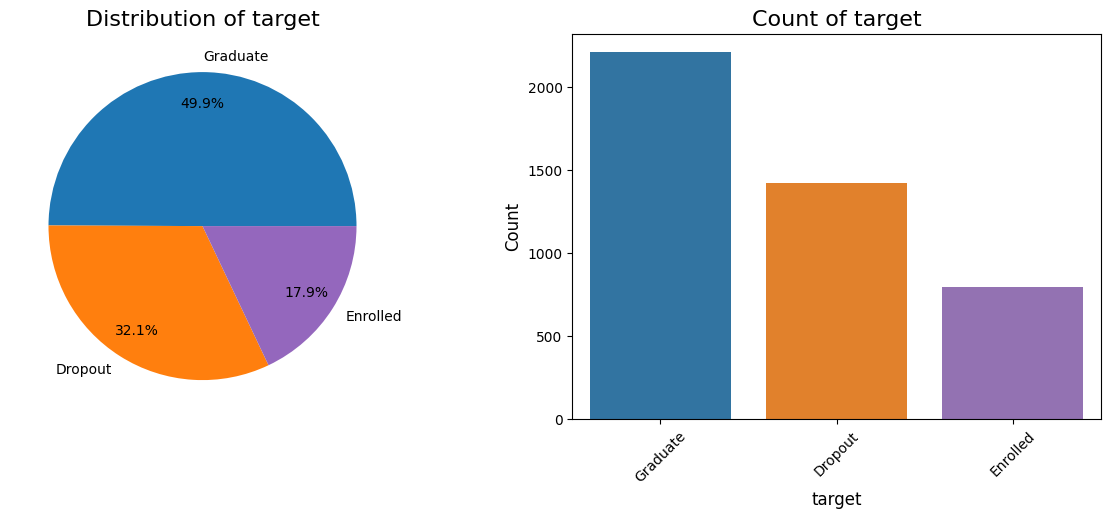

In [12]:
value_counts = df['target'].value_counts()
value_len = len(value_counts)

plt.figure(figsize=(15, 5))

# Set up first subplot
# Pie chart
plt.subplot(1, 2, 1)
plt.pie(
    value_counts,
    autopct='%0.01f%%',
    pctdistance=0.80, 
    colors=colors[:value_len], 
    labels=value_counts.index
)
plt.title(f'Distribution of target', fontsize=16)

# Set up second subplot
# Bar chart
plt.subplot(1, 2, 2)
sns.barplot(
    x=value_counts.index, 
    y=value_counts.values,
    palette=colors[:value_len],
    hue=value_counts.index,
    legend=False
) 
plt.title(f'Count of target', fontsize=16)
plt.xlabel('target', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=12)

plt.show()

---

## 2. **Data Encoding**
Data encoding for the **categorical variables**

In [13]:
# `target` col
df['target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}, inplace=True)
df['target'] = df['target'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [15]:
for col in df.columns:
    print("-"*30)
    print(f"{col} = {df[col].unique()}\n")

------------------------------
Marital Status = [1 2 4 3 5 6]

------------------------------
Application mode = [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

------------------------------
Application order = [5 1 2 4 3 6 9 0]

------------------------------
Course = [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]

------------------------------
Daytime/evening attendance = [1 0]

------------------------------
Previous qualification = [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

------------------------------
Previous qualification (grade) = [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180. 

---

## Exploratory Data Analysis (EDA)

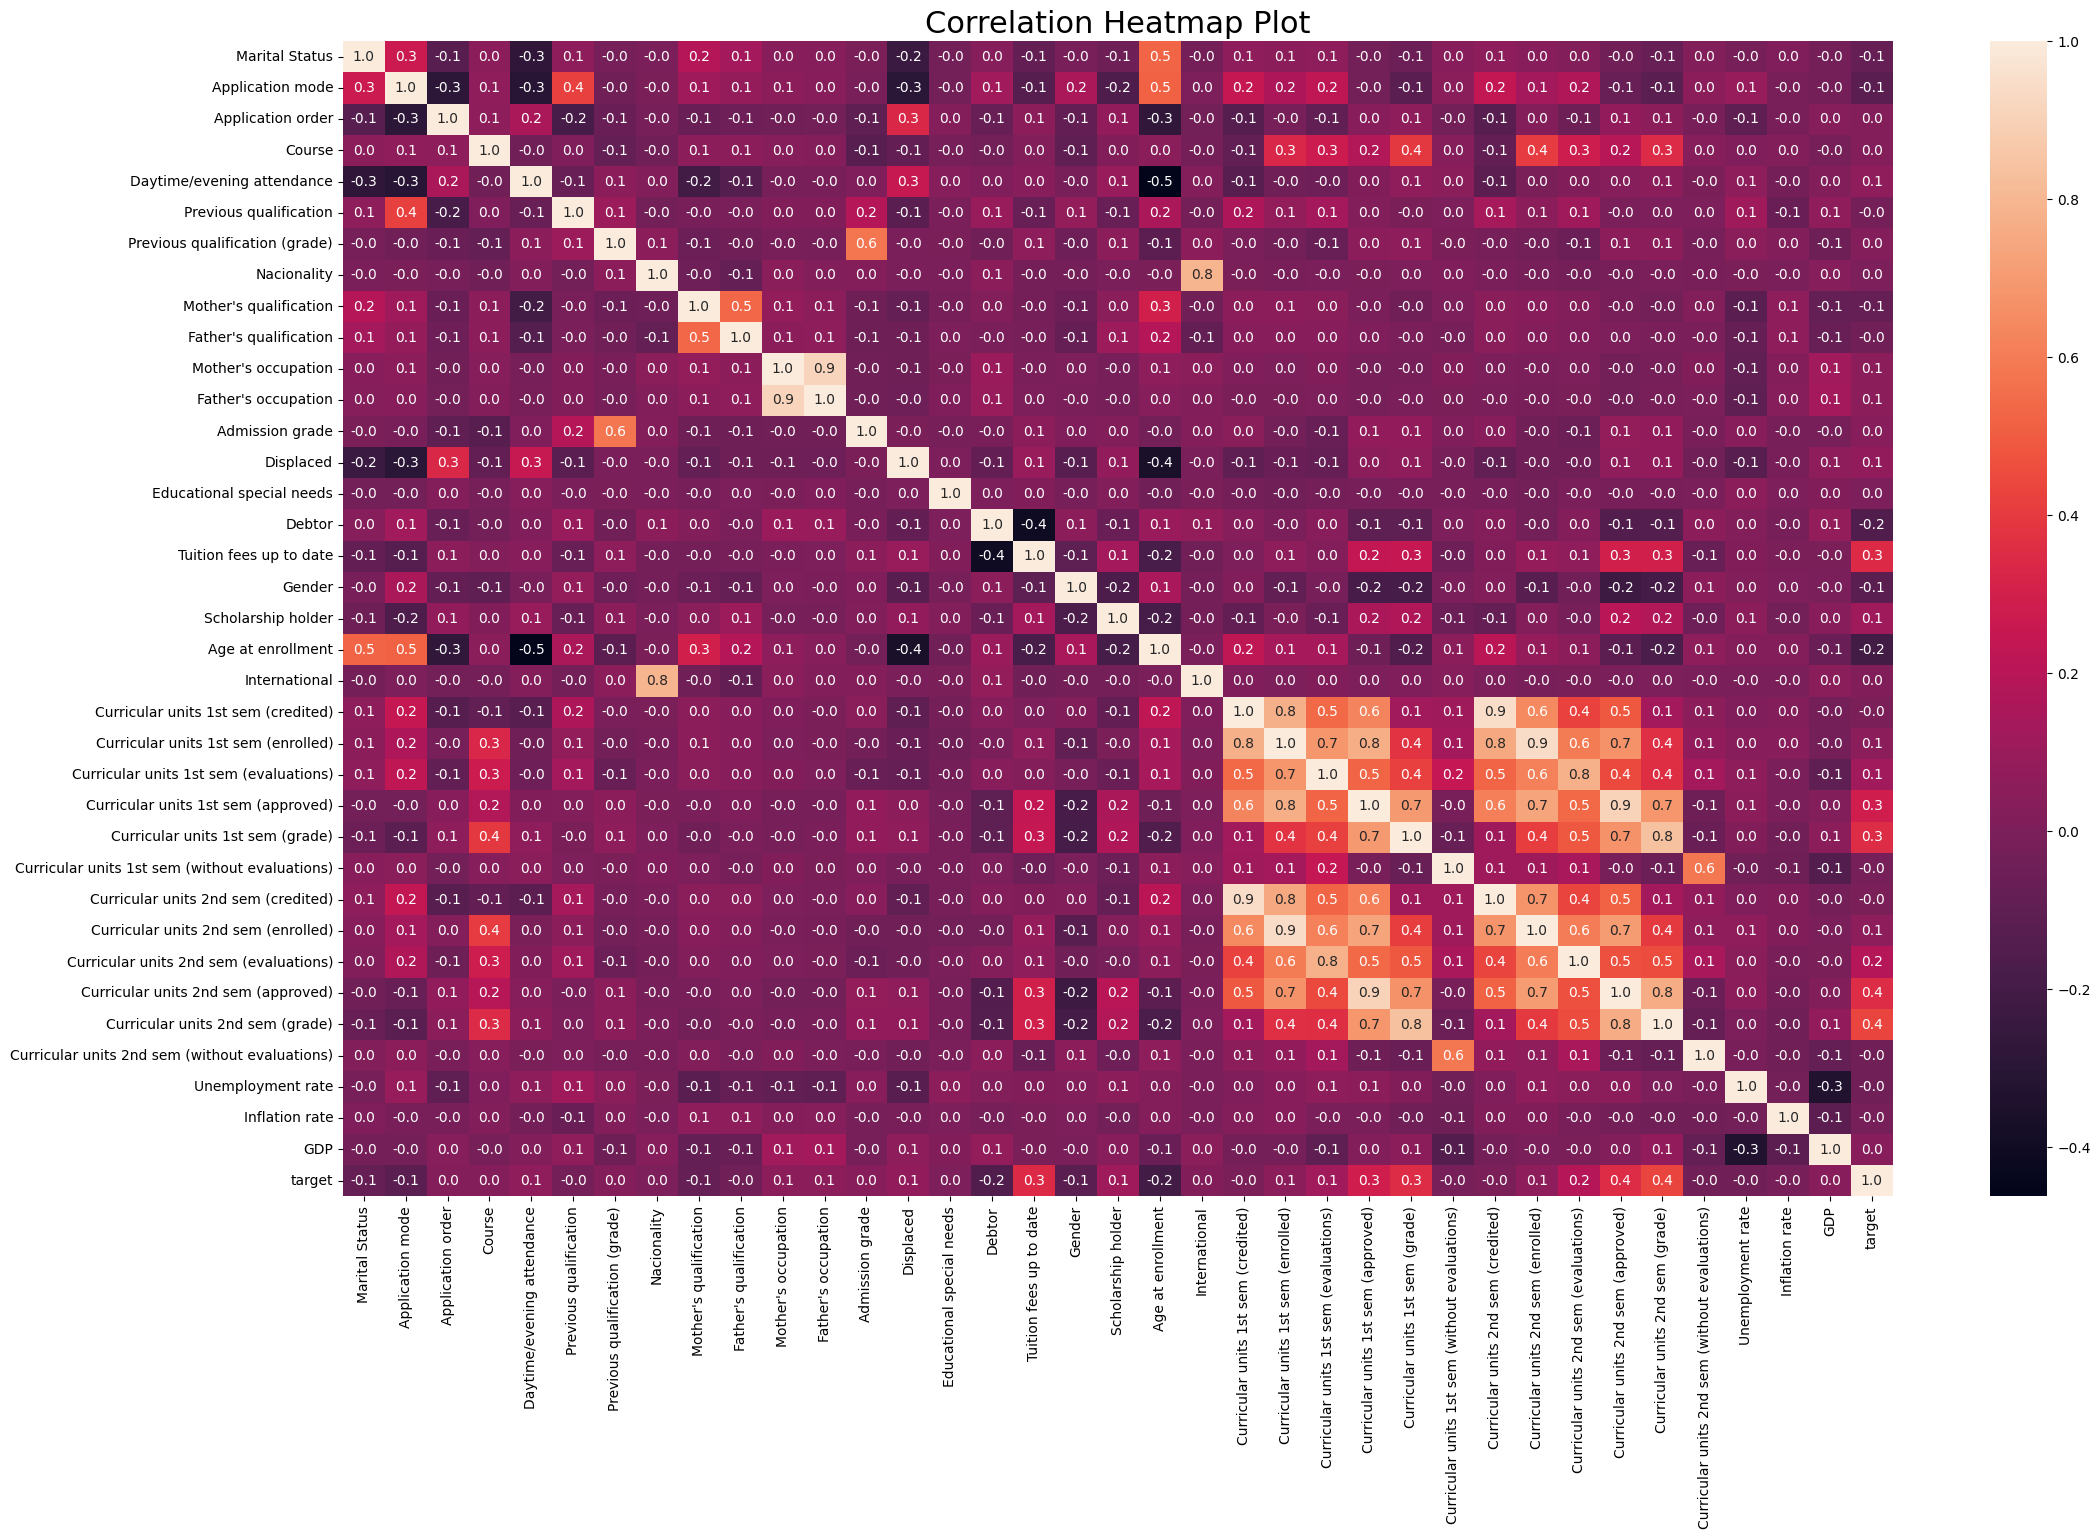

In [16]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(25, 15))

sns.heatmap(
    data=corr_matrix,
    annot=True, 
    # cmap=colors, 
    fmt=".1f"
)

plt.title('Correlation Heatmap Plot', fontsize=22)

# Show the plots
plt.show()

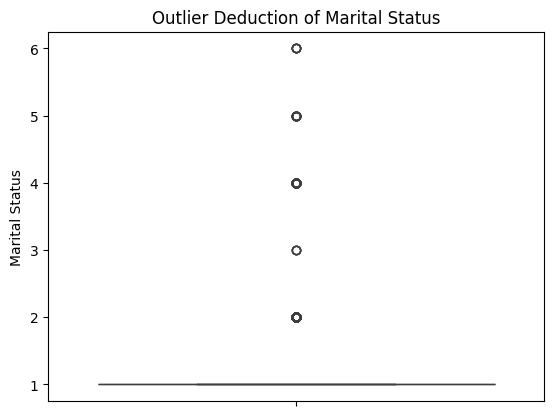

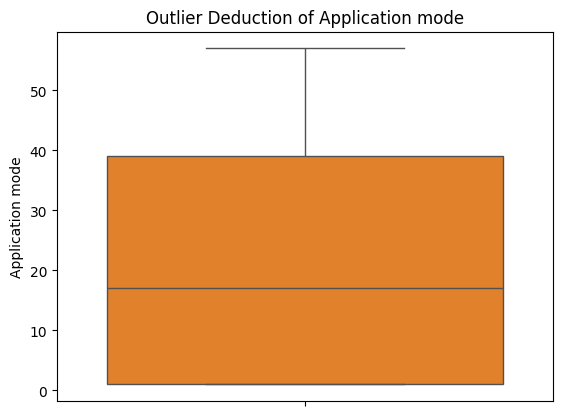

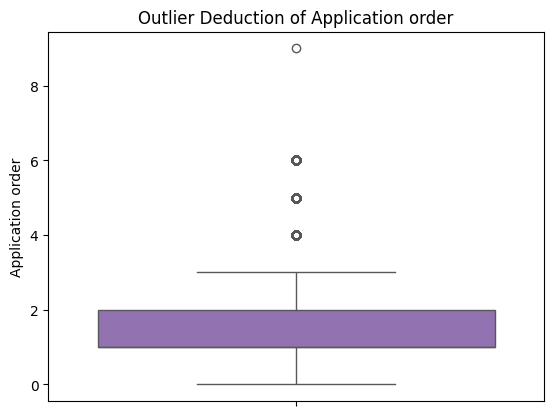

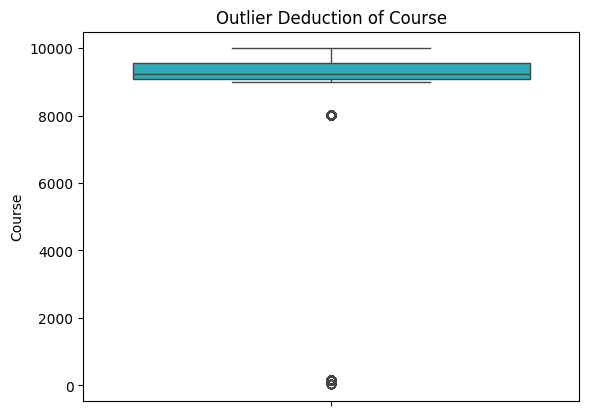

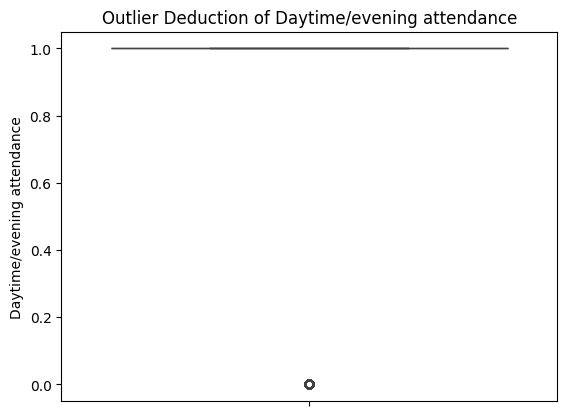

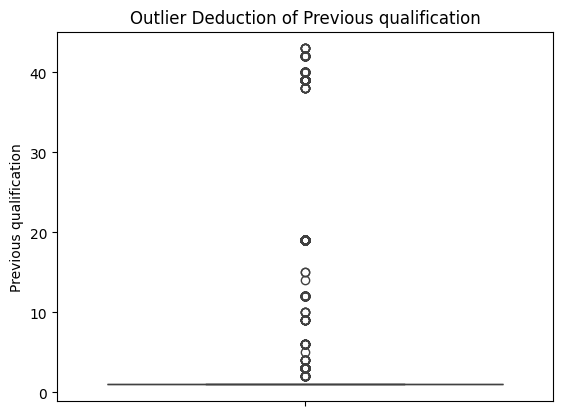

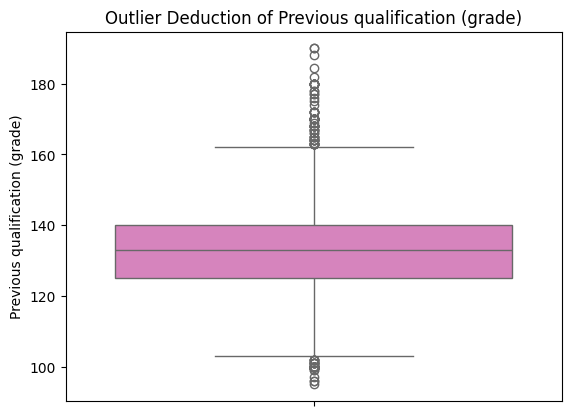

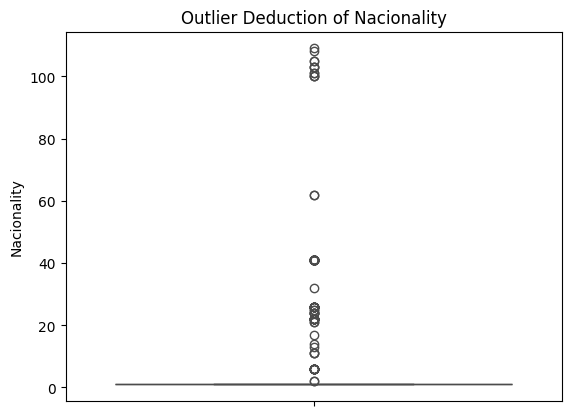

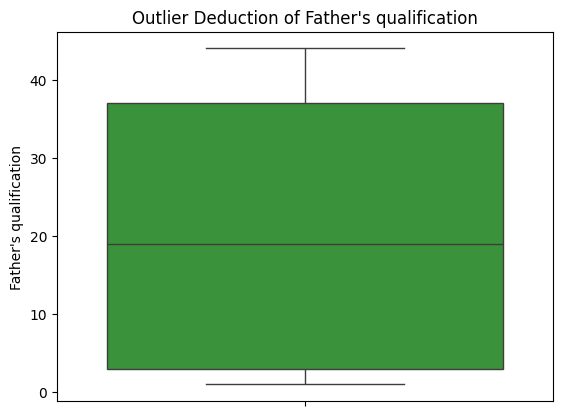

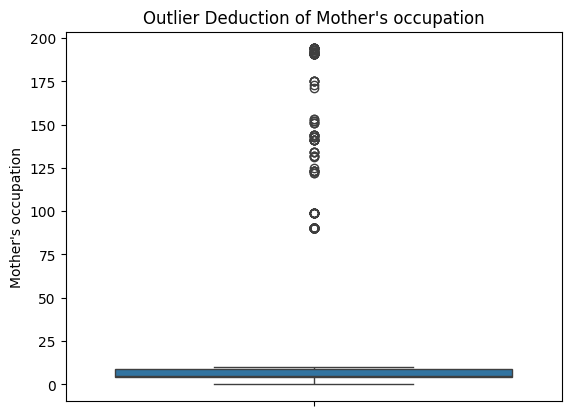

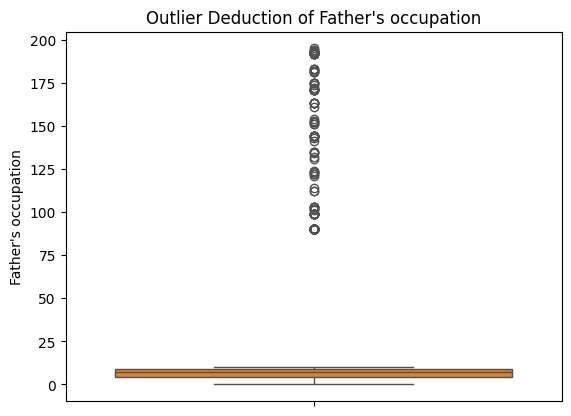

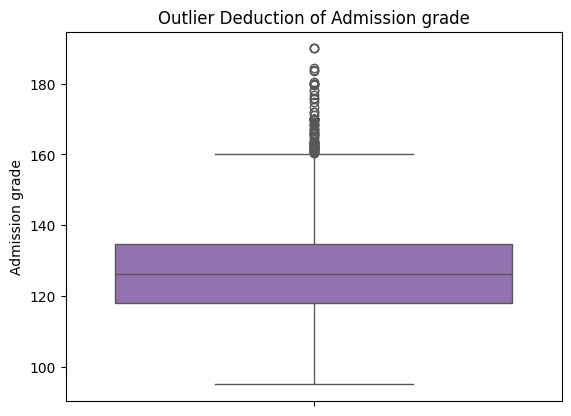

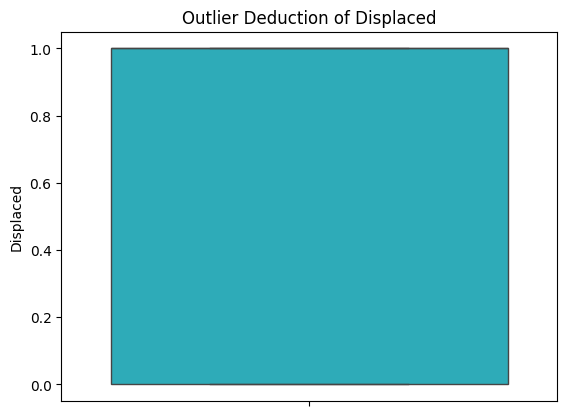

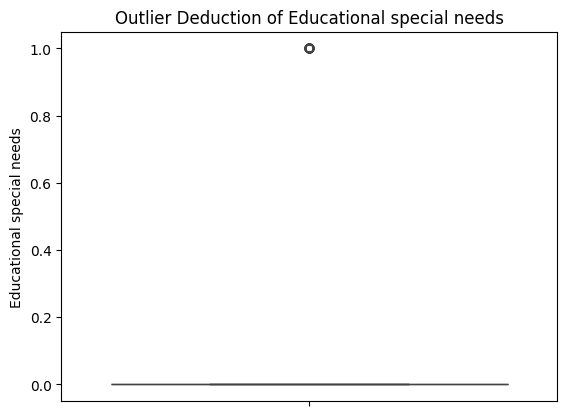

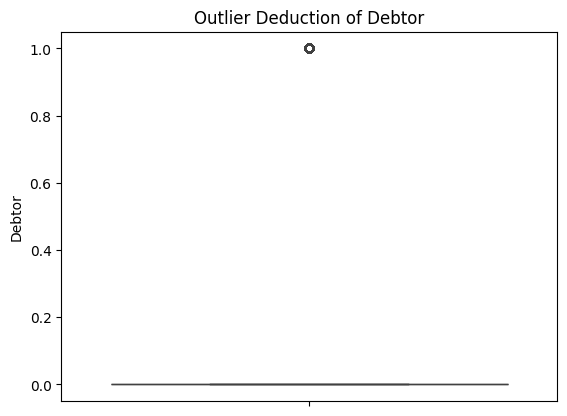

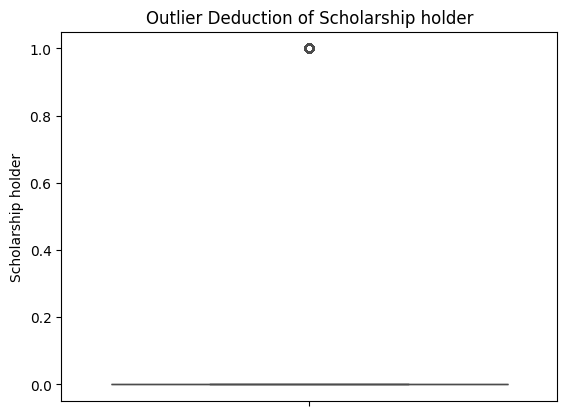

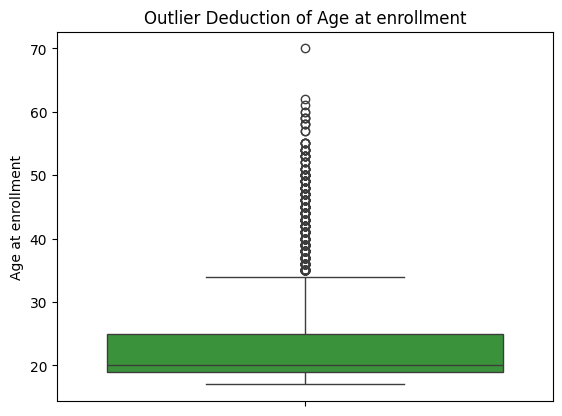

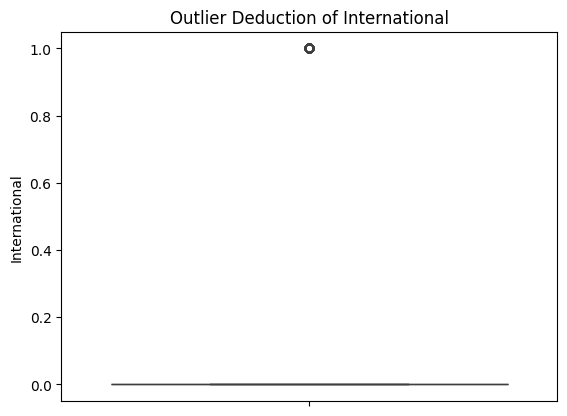

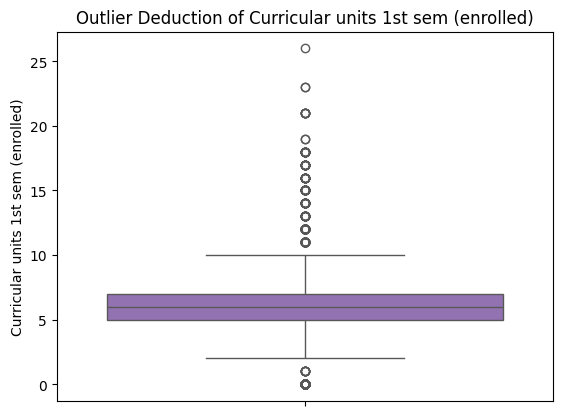

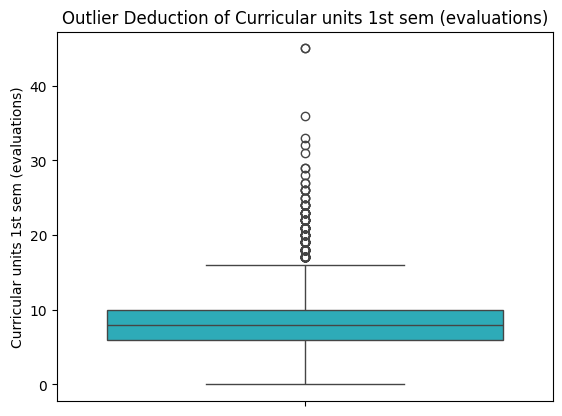

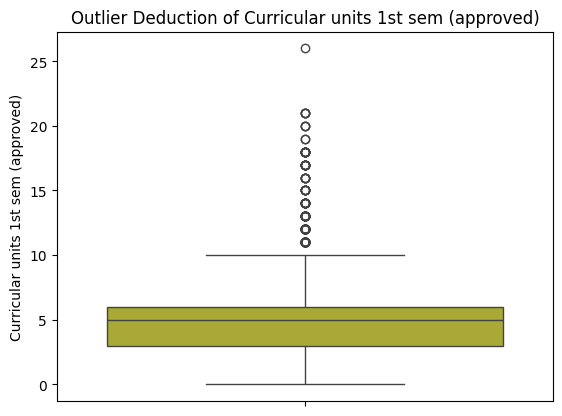

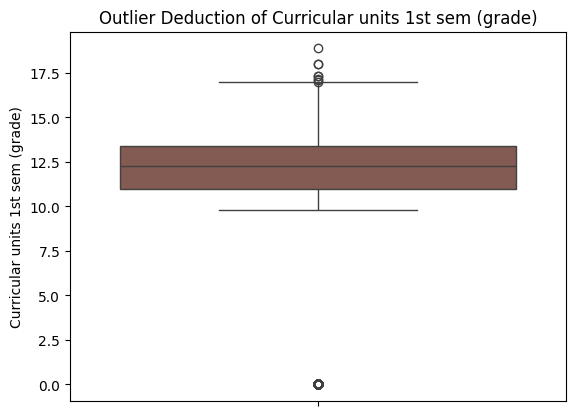

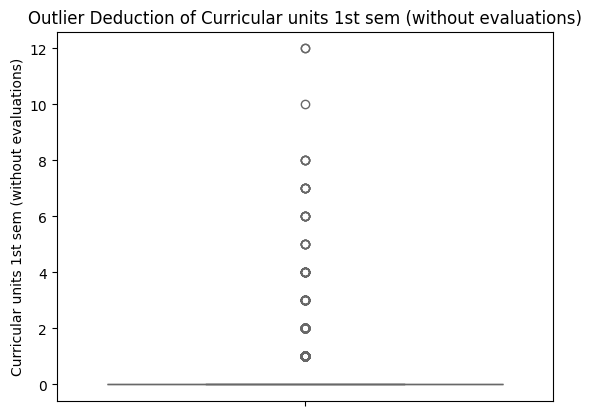

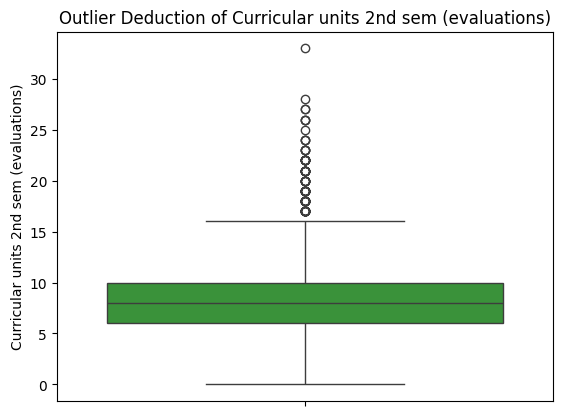

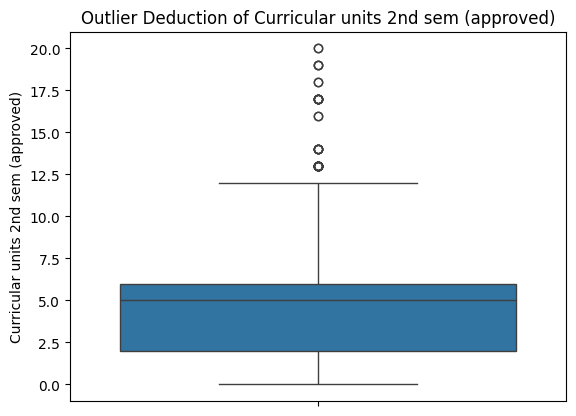

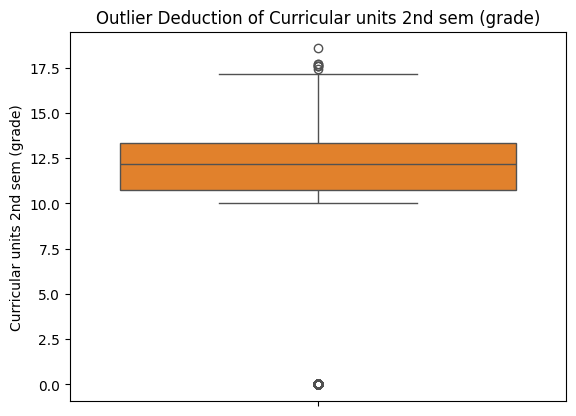

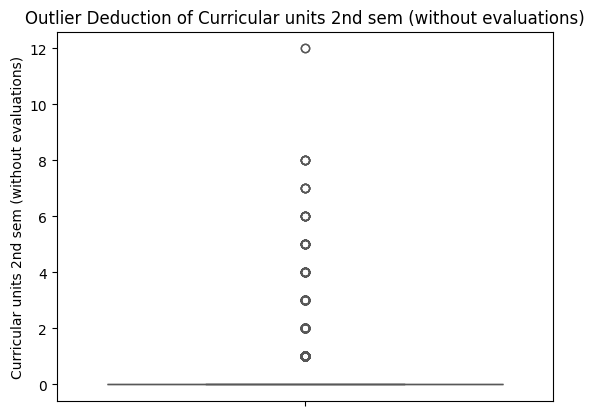

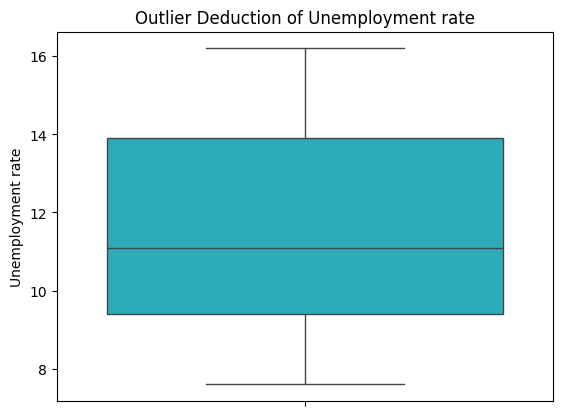

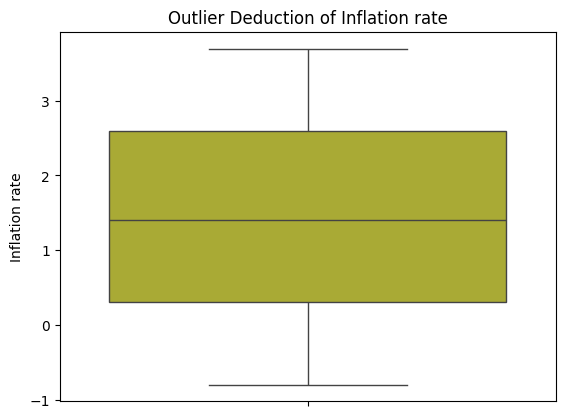

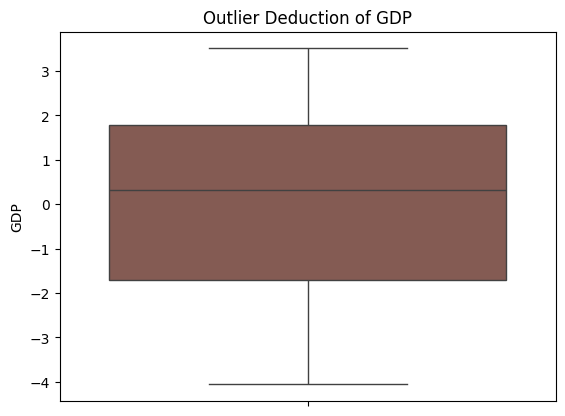

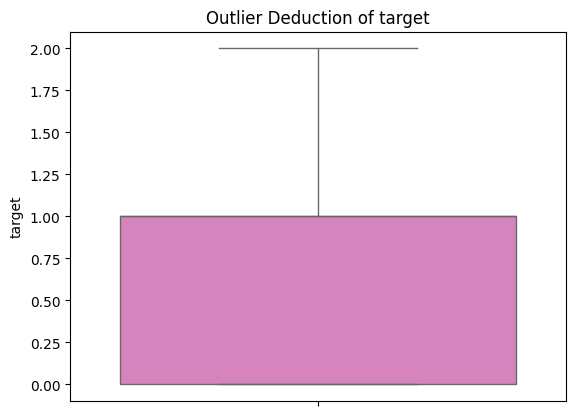

In [17]:
df_col = df.columns
j = 0
for i in range(len(df_col)):
    if j==10:
        j=0
    try:
        if df[df_col[i]].dtype == 'int64' or df[df_col[i]].dtype == 'float64':
            # Creating the boxplot
            sns.boxplot(data=df, y=df[df_col[i]], color=colors[j])
            j+=1

            plt.title(f"Outlier Deduction of {df_col[i]}")

            # Show the plots
            plt.show()
    except:
        continue

---

## 3. **Outliers**

In [18]:
key_numeric_cols = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade', 
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

In [19]:
# Checking for outliers in key columns
for col in key_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_pct = outliers_count / len(df) * 100
    print(f"{col}: {outliers_count} outliers ({outlier_pct:.2f}%)")

Age at enrollment: 441 outliers (9.97%)
Previous qualification (grade): 179 outliers (4.05%)
Admission grade: 86 outliers (1.94%)
Curricular units 1st sem (grade): 726 outliers (16.41%)
Curricular units 2nd sem (grade): 877 outliers (19.82%)


In [ ]:

# Capping outliers for key columns
for col in key_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)  # Don't go below 0 for grades
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing them
    df[col] = df[col].clip(lower_bound, upper_bound)
    
    print(f"Column {col} capped between {lower_bound:.2f} and {upper_bound:.2f}")

Column Age at enrollment capped between 10.00 and 34.00
Column Previous qualification (grade) capped between 102.50 and 162.50
Column Admission grade capped between 92.55 and 160.15
Column Curricular units 1st sem (grade) capped between 7.40 and 17.00
Column Curricular units 2nd sem (grade) capped between 6.88 and 17.21


---

## 4. **Feature Engineering**

#### Dividing the Data

Dividing the data into X, y 
- ***X***: the features 
- ***y*** : the target 🎯 

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Standardize the features

In [57]:
# Check the range of values
# print("▶▶▶Min values:\n", df.min())
# print("▶▶▶Max values:\n", df.max())

# Check the mean and standard deviation
# print("▶▶▶Mean values:\n", df.iloc[:,:-1].mean())
# print("▶▶▶Standard deviation values:\n", df.iloc[:,:-1].std())

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Apply Power Transformation


In [23]:
pt = PowerTransformer(method='yeo-johnson')
data_gauss = pt.fit_transform(X_scaled)

---

#### Apply PCA - Principal Component Analysis to reduce dimensinality

**Explained Variance Ratio:**

Plotting the cumulative explained variance ratio to see how much variance is explained by each additional component. The **"elbow" point in this plot often indicates a good choice for `n_components`**.

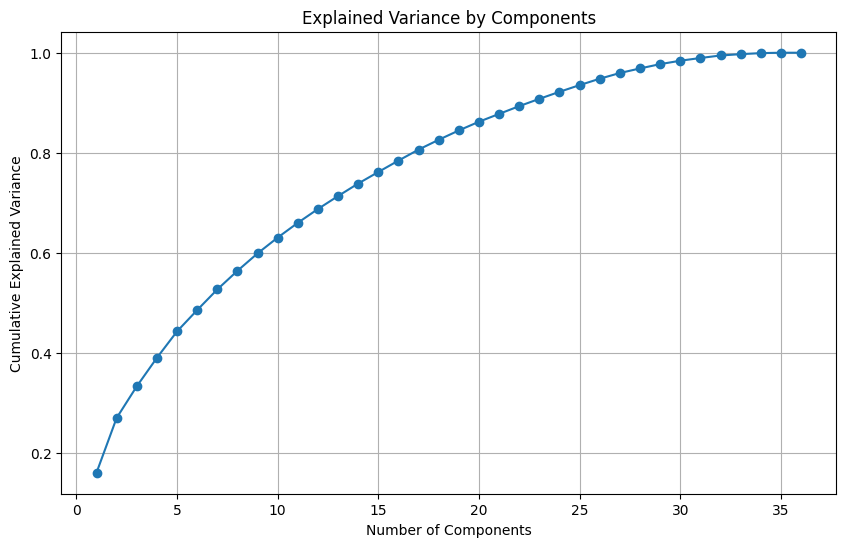

In [24]:
# Explained Variance Ratio
pca = PCA().fit(data_gauss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

The `"elbow"` point in the plot appears to be around **10 components**. This is where the curve starts to level off more noticeably, indicating that adding more components beyond this point contributes less to the cumulative explained variance.

In [25]:
# Explained Variance Ratio
pca = PCA().fit(data_gauss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
# Draw a circle around point 10
plt.scatter(10, pca.explained_variance_ratio_.cumsum()[9],
            s=4000, facecolors='none', edgecolors='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

---

In [26]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(data_gauss)

In [27]:
# Principal Components
components = pca.components_

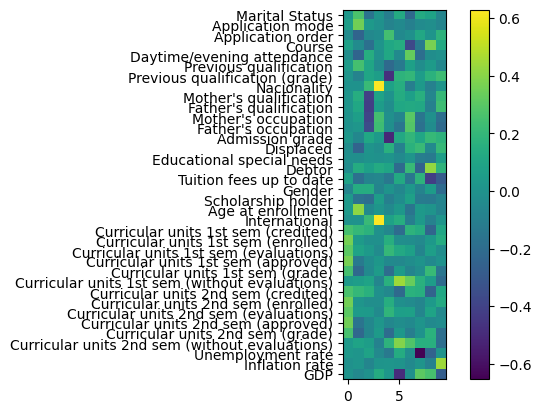

In [28]:
plt.imshow(components.T)
plt.yticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

In [29]:

new_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'PCA4': X_pca[:, 3],
    'PCA5': X_pca[:, 4],
    'PCA6': X_pca[:, 5],
    'PCA7': X_pca[:, 6],
    'PCA8': X_pca[:, 7],
    'PCA9': X_pca[:, 8],
    'PCA10': X_pca[:, 9],
    'Target': y
})

new_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -6.267829 -0.344663  0.717248 -0.285799 -0.217285 -1.556542  0.938430   
1    -0.088821 -1.330886  2.457550 -0.524157 -1.772094 -0.178105  0.114045   
2    -4.119605  0.181109 -1.098934  0.286329  1.512530 -1.515718  1.262697   
3     0.414880 -1.063560 -1.021818 -0.562075  1.196736  0.882992 -0.933503   
4     0.357880  2.820620 -2.430088  0.324316 -1.029137  0.318310 -1.693254   
...        ...       ...       ...       ...       ...       ...       ...   
4419 -0.095545 -1.638194  0.983427 -1.003094  0.574557  0.817915 -1.519329   
4420 -1.256380 -1.083842  3.160661  8.688903  3.211543 -0.339171 -0.630937   
4421  1.052609 -1.133327 -1.778319  0.681595 -2.084690  0.755143  0.882669   
4422 -0.538261 -1.842374 -0.931507  0.177897 -2.705458  1.313790  1.196355   
4423  0.231617 -0.730321  1.517358  8.263963 -0.681027  3.126457 -1.159089   

          PCA8      PCA9     PCA10  Target  
0     1.375998 -1.793730 -0.838552       0  
1    -0.816556  2.079990  0.363103       1  
2     0.477275  0.104904  1.685070       0  
3     0.653539  0.029746  0.586405       1  
4     0.413805 -0.781332 -1.708226       1  
...        ...       ...       ...     ...  
4419 -1.981425 -0.143471  0.212821       1  
4420 -0.940503  1.743959  0.981588       0  
4421 -0.452076  0.569242  0.092994       0  
4422  0.839451  0.000451  0.818571       1  
4423  0.494426 -1.050764  2.435267       1  

[4424 rows x 11 columns]

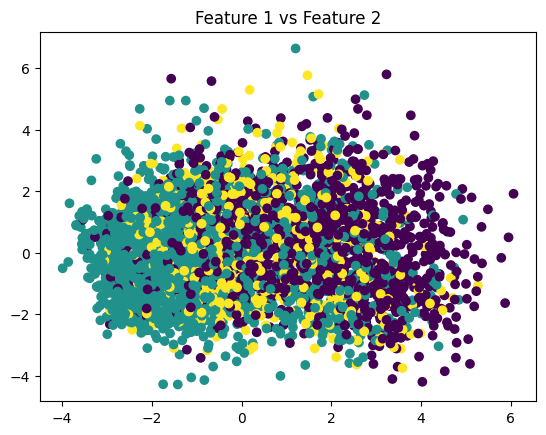

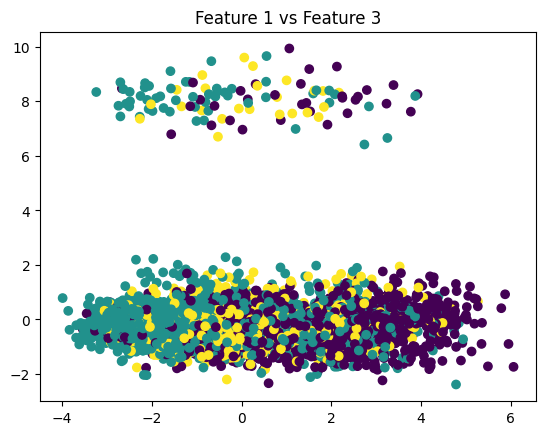

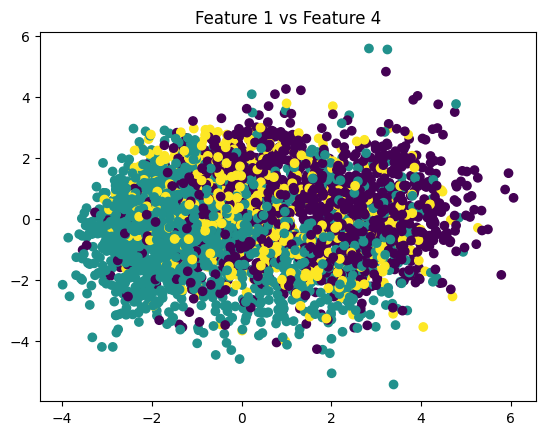

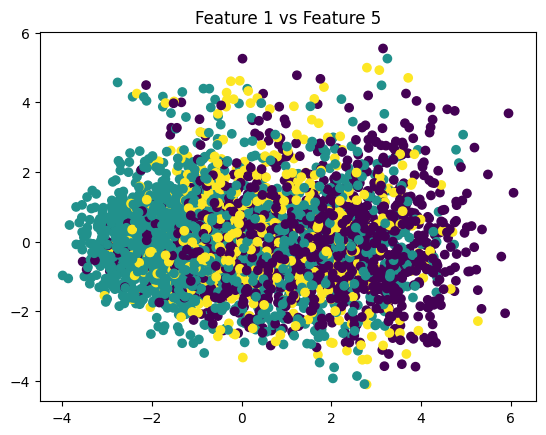

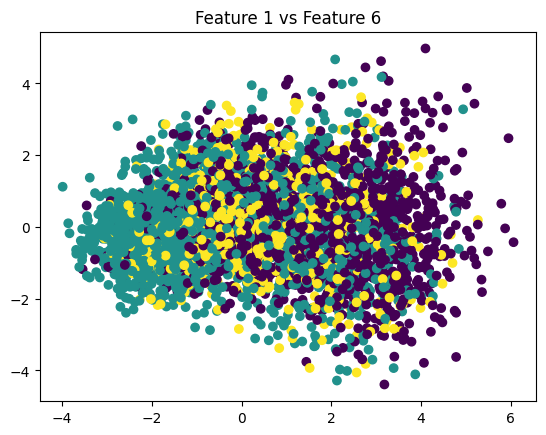

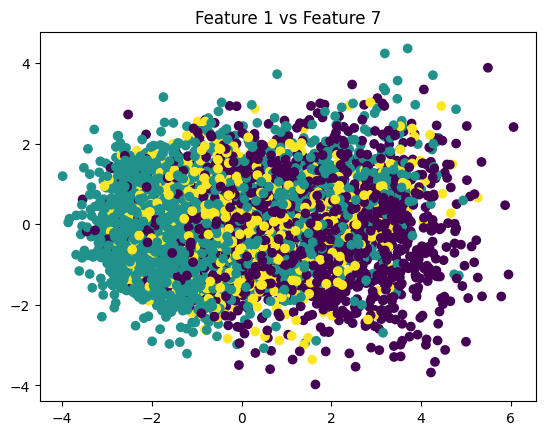

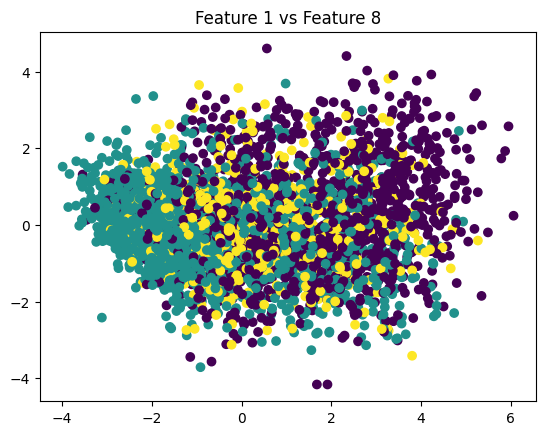

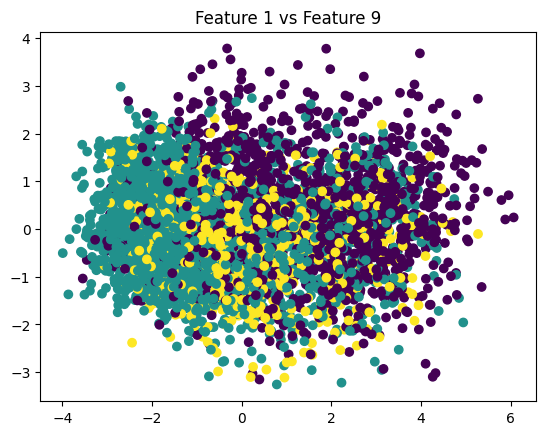

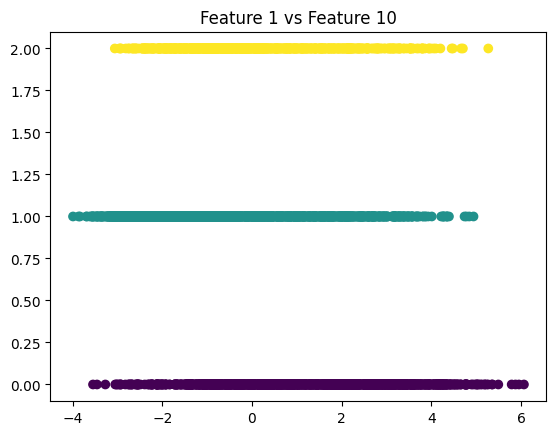

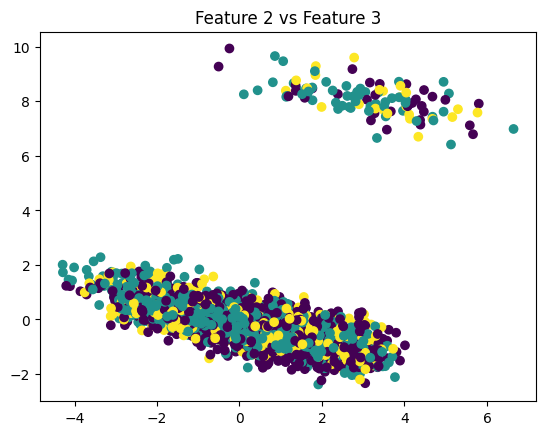

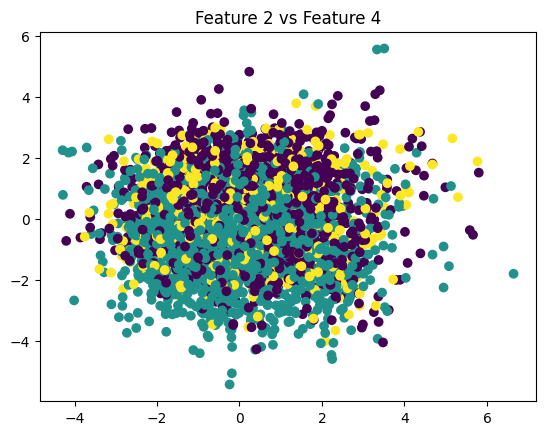

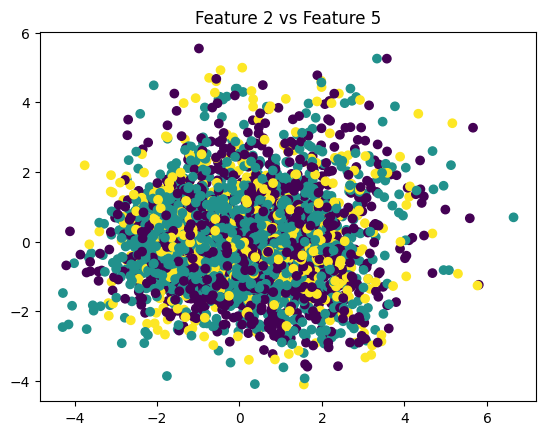

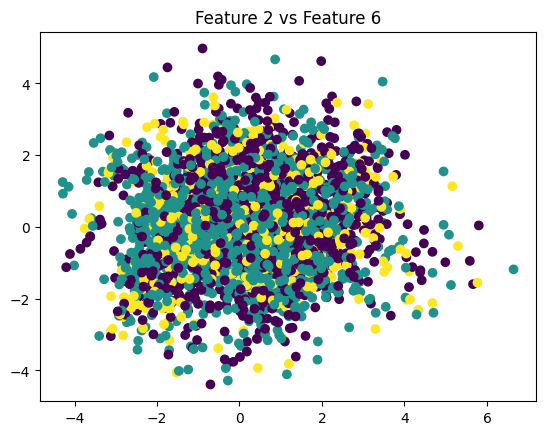

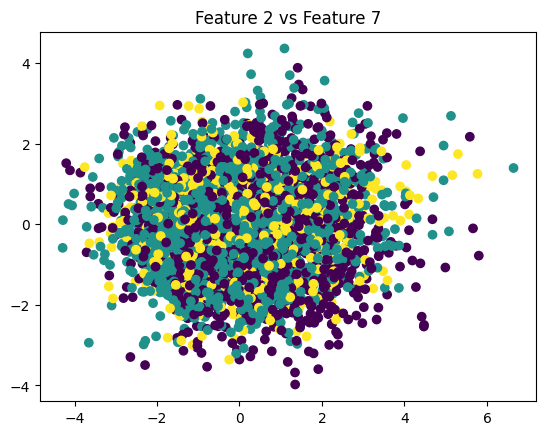

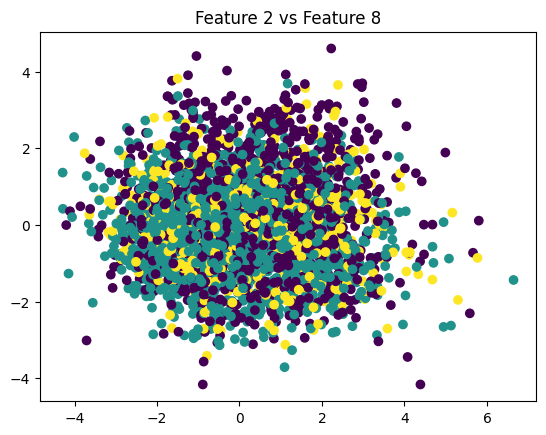

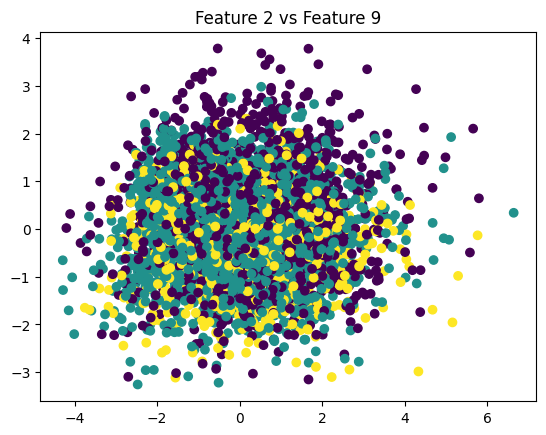

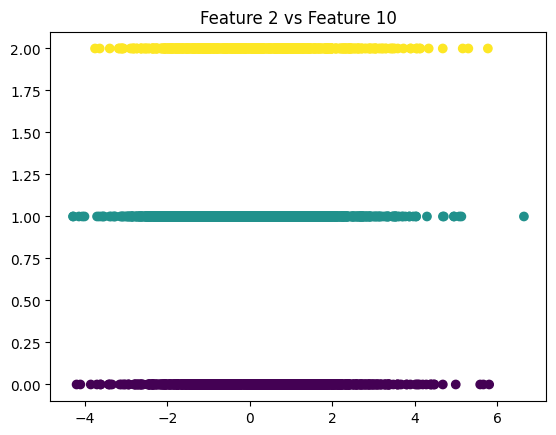

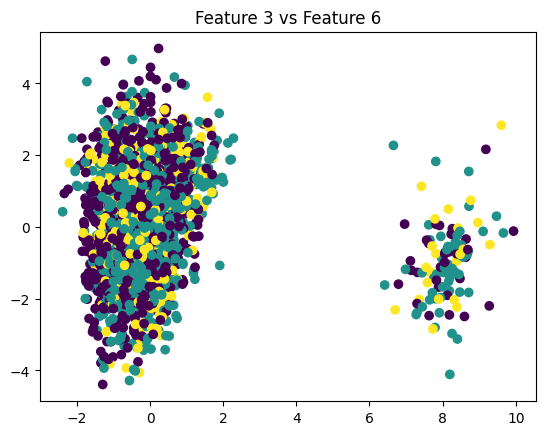

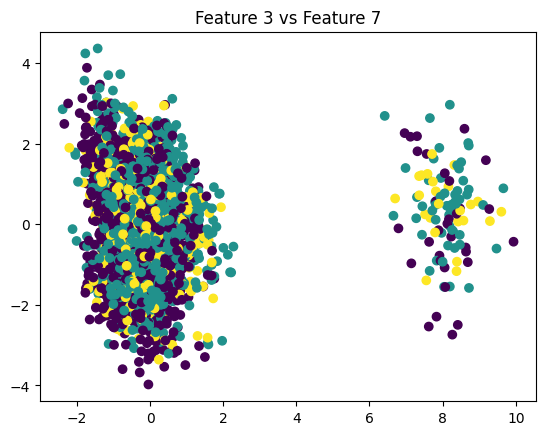

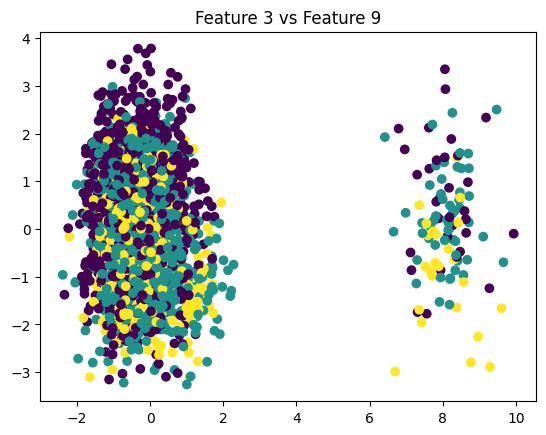

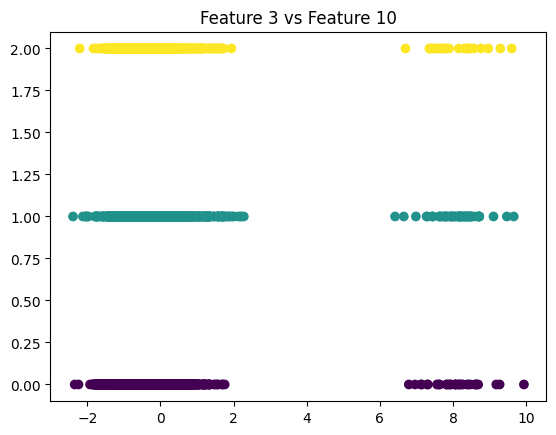

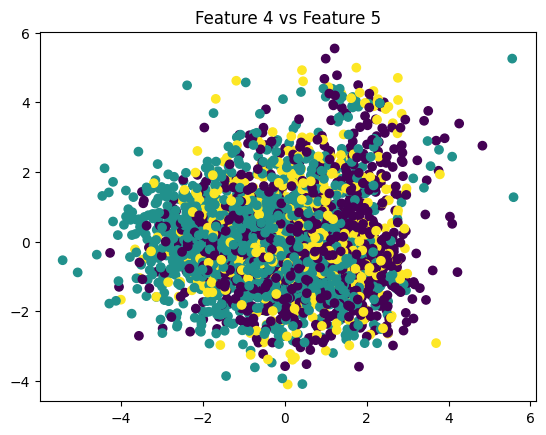

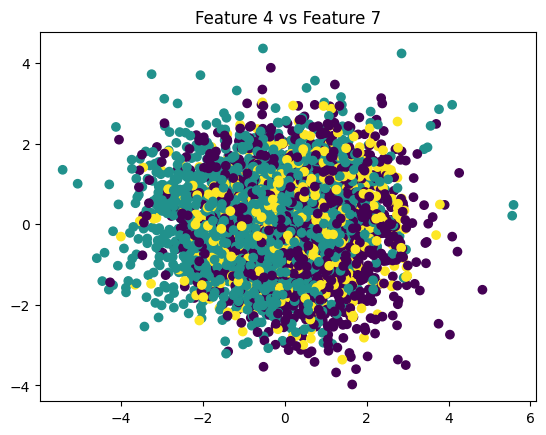

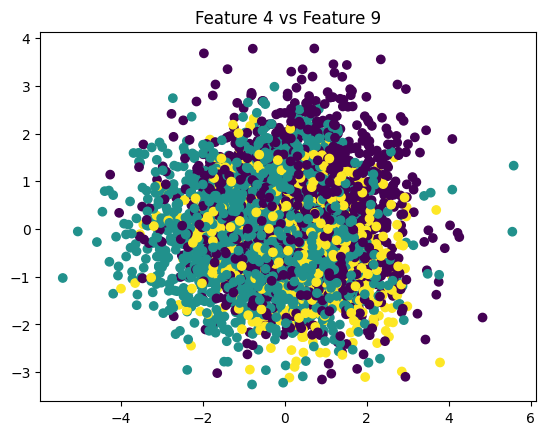

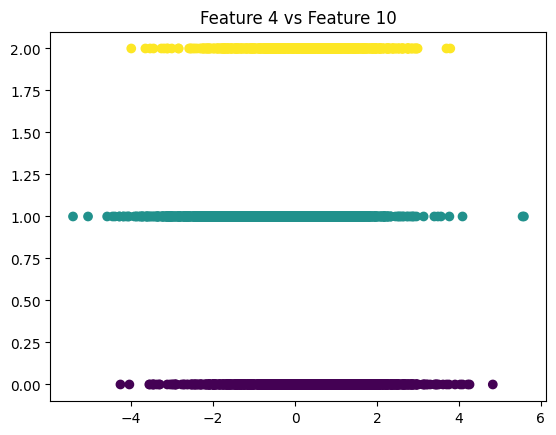

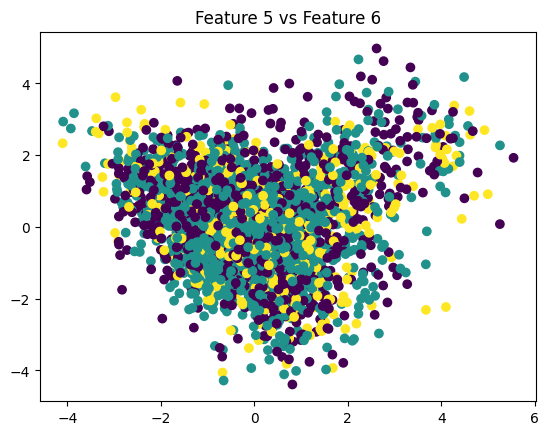

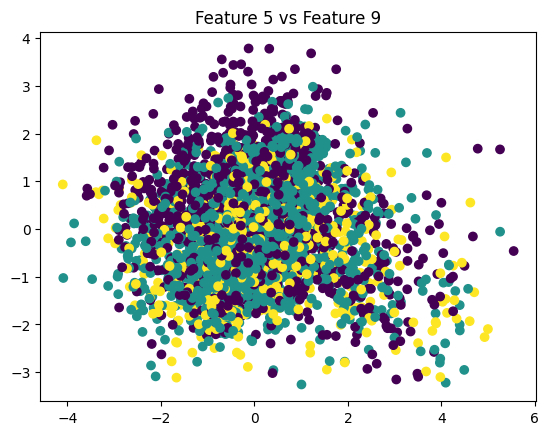

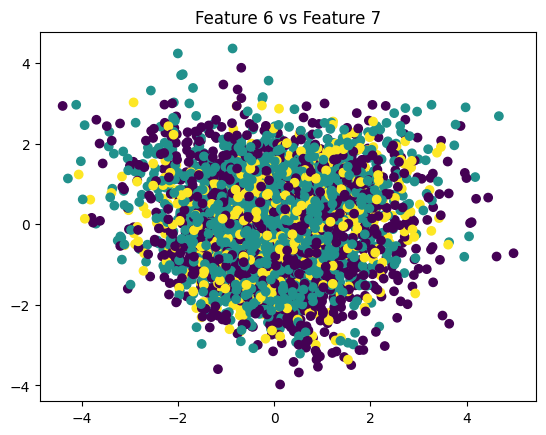

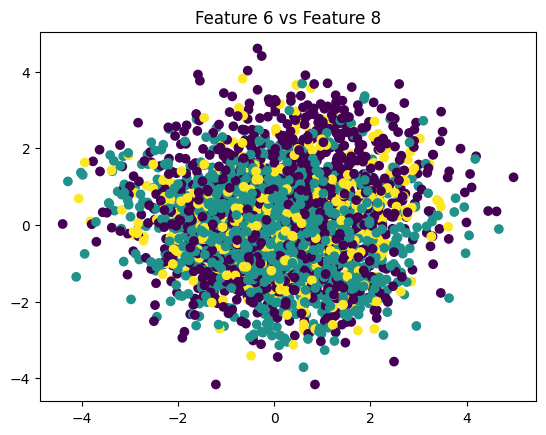

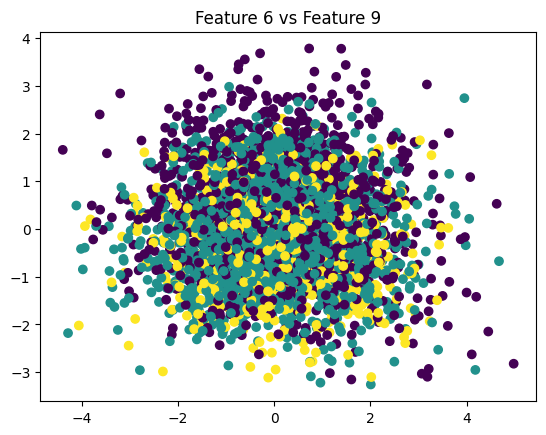

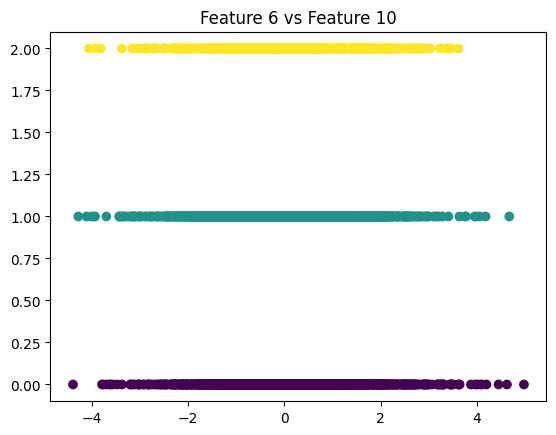

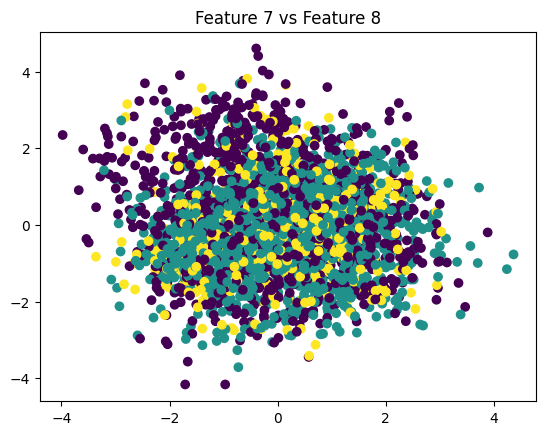

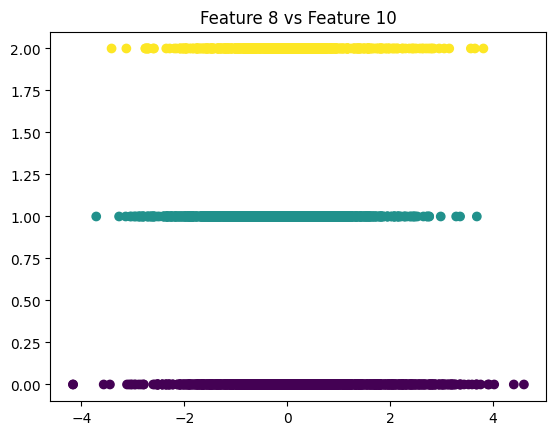

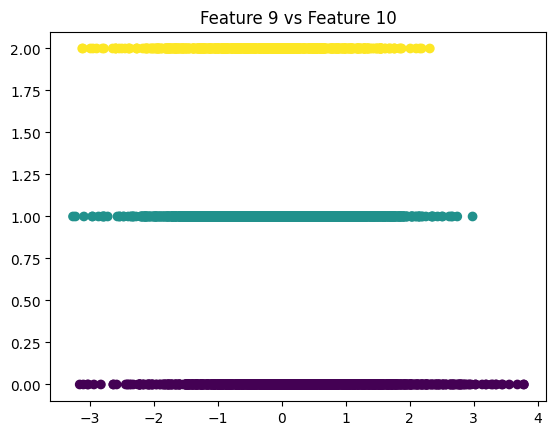

In [30]:
for i in range(1,11):
    for j in range(i+1,11):
        plt.scatter(new_df.iloc[:, i], new_df.iloc[:, j], c=new_df.Target)
        plt.title(f'Feature {i} vs Feature {j}')
        plt.show()

---

---

# **Algorithm**

## 1. **Dividing the New Dataset**

Dividing the new dataset into X, y 
- ***X***: the features 
- ***y*** : the target 🎯 

In [31]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

---

## 2. **Splitting the Data into Train/Test**

In [32]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3539, 10), (885, 10), (3539,), (885,))

---

## 3. **Choosing The Hyperparameter For The Models**

### 3.1 Creating the object of KNN classification model & Random Forest Classifier

In [34]:
knn = KNC()
rfc = RFC()

### 3.2 Defining the parameter grid for each models to search

In [35]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
rfc_param_grid = {
    # 'n_estimators': [100, 200, 300, 400, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth': [None, 10, 20, 30, 40, 50],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

### 3.3 Creating GridSearchCV object for each models & Fitting it

In [36]:
knn_grid_model = GridSearchCV(
    estimator=knn, 
    param_grid=knn_param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2)

knn_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [37]:
rfc_grid_model = GridSearchCV(
    estimator=rfc, 
    param_grid=rfc_param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2,
    error_score='raise'
)

try:
    rfc_grid_model.fit(X_train, y_train)
except Exception as e:
    print(f"▶▶▶Error during fitting: {e}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


### 3.4 Displaying the best parameters in each models

In [38]:
knn_best_params = knn_grid_model.best_params_
print(f"▶▶▶The Best Parameters in KNeighborsClassifier are:\n{knn_best_params}")

print('*'*30)

rfc_best_params = rfc_grid_model.best_params_
print(f"▶▶▶The Best Parameters in RandomForestClassifier are:\n{rfc_best_params}")

▶▶▶The Best Parameters in KNeighborsClassifier are:
{'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
******************************
▶▶▶The Best Parameters in RandomForestClassifier are:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


---

## 4. **Building and Training the Models**

In [39]:
# Building KNeighborsClassifier model
knn = KNC(**knn_best_params)

# Train the KNeighborsClassifier model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [40]:
# Building RandomForestClassifier model
rfc = RFC(**rfc_best_params)

# Train the RandomForestClassifier model
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

---

## 5. **Testing the Models**

In [41]:
# Test KNeighborsClassifier model
y_pred_knn = knn.predict(X_test)

# Test RandomForestClassifier model
y_pred_rfc = rfc.predict(X_test)

---

---

# **Interpretation of Results**

In [42]:
# Classification report for KNeighborsClassifier model
print(classification_report(y_test, y_pred_knn, target_names=['Dropout', 'Graduate', 'Enrolled']))

print('*'*55)

# Classification report for RandomForestClassifier model
print(classification_report(y_test, y_pred_rfc, target_names=['Dropout', 'Graduate', 'Enrolled']))

              precision    recall  f1-score   support

     Dropout       0.86      0.65      0.74       316
    Graduate       0.70      0.94      0.80       418
    Enrolled       0.44      0.25      0.31       151

    accuracy                           0.72       885
   macro avg       0.66      0.61      0.62       885
weighted avg       0.71      0.72      0.70       885

*******************************************************
              precision    recall  f1-score   support

     Dropout       0.84      0.67      0.74       316
    Graduate       0.69      0.94      0.80       418
    Enrolled       0.35      0.15      0.21       151

    accuracy                           0.71       885
   macro avg       0.63      0.59      0.59       885
weighted avg       0.69      0.71      0.68       885



In [43]:
# Confusion Matrix for KNeighborsClassifier model
Conf_M_knn = confusion_matrix(y_test, y_pred_knn)
print(f"▶▶▶Confusion Matrix for KNeighborsClassifier model:\n{Conf_M_knn}")

print('*'*30)

# Confusion Matrix for RandomForestClassifier model
Conf_M_rfc = confusion_matrix(y_test, y_pred_rfc)
print(f"▶▶▶Confusion Matrix for RandomForestClassifier model:\n{Conf_M_rfc}")

▶▶▶Confusion Matrix for KNeighborsClassifier model:
[[204  80  32]
 [  9 393  16]
 [ 25  89  37]]
******************************
▶▶▶Confusion Matrix for RandomForestClassifier model:
[[211  77  28]
 [ 10 394  14]
 [ 31  97  23]]


In [44]:
# Accuracy Score for KNeighborsClassifier model
acu_scr_knn = accuracy_score(y_test, y_pred_knn)
print(f"▶▶▶Accuracy Score for KNeighborsClassifier model:\n{acu_scr_knn}")

print('*'*30)

# Accuracy Score for RandomForestClassifier model
acu_scr_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"▶▶▶Accuracy Score for RandomForestClassifier model:\n{acu_scr_rfc}")

▶▶▶Accuracy Score for KNeighborsClassifier model:
0.7163841807909604
******************************
▶▶▶Accuracy Score for RandomForestClassifier model:
0.7096045197740113


---

---

# **Visualization**

In [45]:
# Feature importance
importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rfc.feature_importances_
}).sort_values('Importance', ascending=False)
importance

Feature  Importance
0    PCA1    0.253653
1    PCA2    0.172881
4    PCA5    0.098964
8    PCA9    0.083782
9   PCA10    0.080345
7    PCA8    0.063523
2    PCA3    0.063189
6    PCA7    0.063149
3    PCA4    0.061397
5    PCA6    0.059119

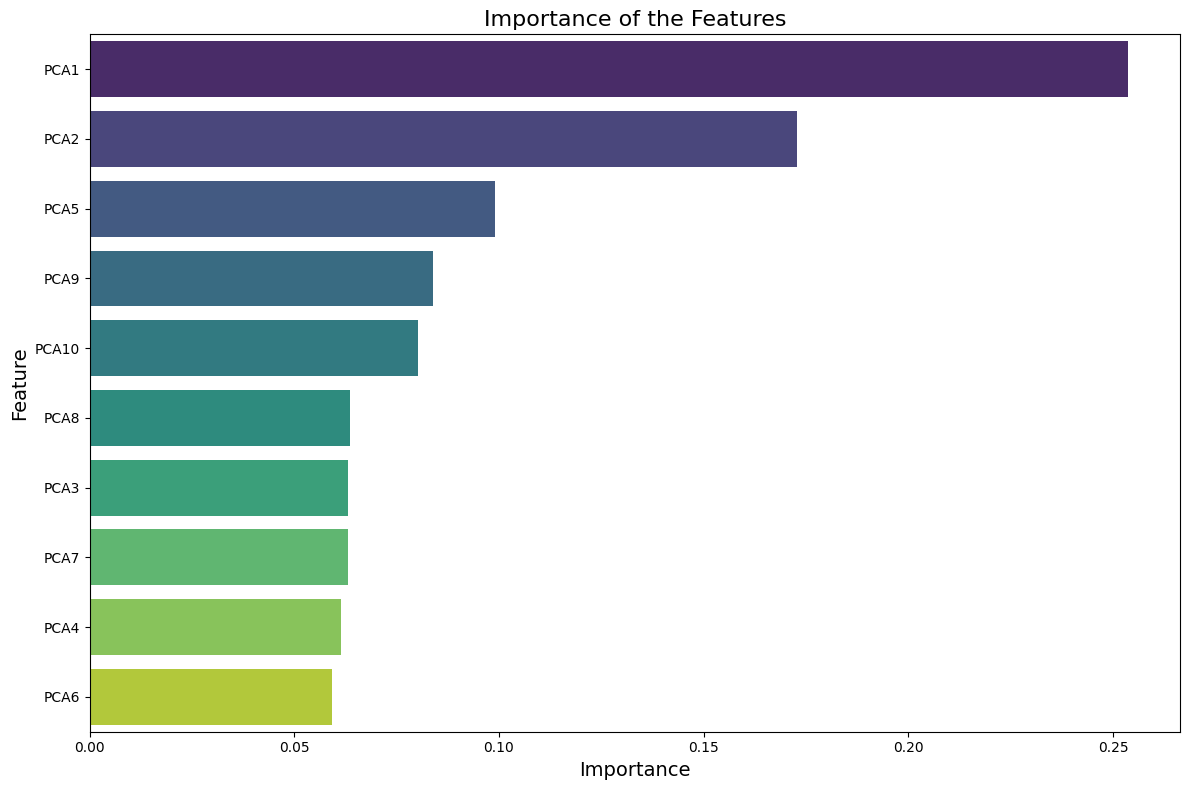

In [47]:
# Visualize Importance of the Features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance, palette='viridis')
plt.title('Importance of the Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

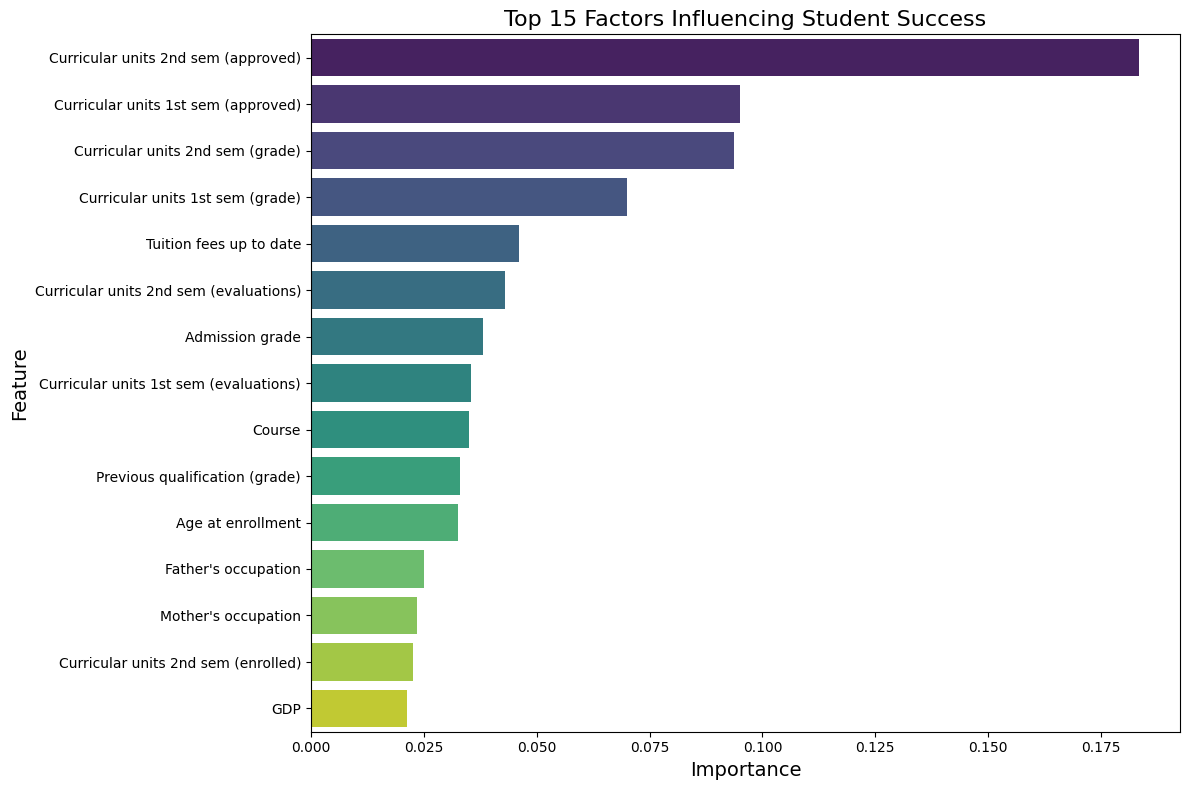

In [48]:
X_2 = df.iloc[:, :-1]
y_2 = df.iloc[:, -1]

scaler_2 = StandardScaler()
X_2_scaled = scaler_2.fit_transform(X_2)

pt_2 = PowerTransformer(method='yeo-johnson')
data_gauss_2 = pt_2.fit_transform(X_2_scaled)

(X_2_train, X_2_test, y_2_train, y_2_test) = train_test_split(data_gauss_2, y_2, test_size=.2, random_state=42)

rfc_2 = RFC(**rfc_best_params)
rfc_2.fit(X_2_train, y_2_train)

importance_2 = pd.DataFrame({
        'Feature': X_2.columns,
        'Importance': rfc_2.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_2.head(15), palette='viridis')
plt.title('Top 15 Factors Influencing Student Success', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

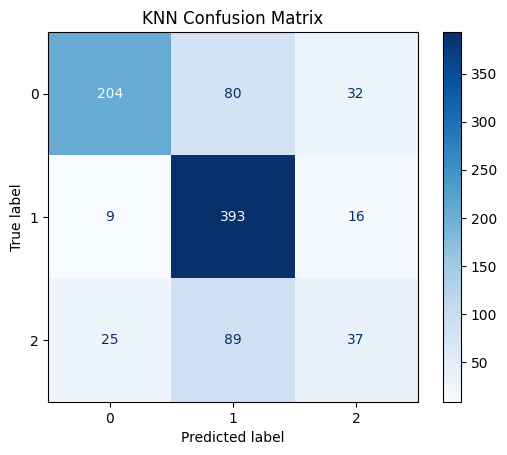

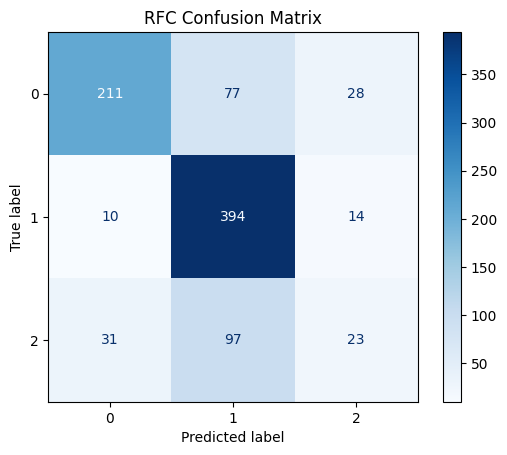

In [49]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=Conf_M_knn)
disp_knn.plot(cmap='Blues')
plt.title("KNN Confusion Matrix")

disp_rfc = ConfusionMatrixDisplay(confusion_matrix=Conf_M_rfc)
disp_rfc.plot(cmap='Blues')
plt.title("RFC Confusion Matrix")

plt.show()

---

---

# **Model's Performance and Evaluation**

### **🔍 Accuracy Comparison**

- **KNeighborsClassifier Accuracy:** 0.7220

- **RandomForestClassifier Accuracy:** 0.7164

➡️ **KNN slightly outperforms Random Forest** in terms of overall accuracy, though the margin is minimal (approximately 0.0056 difference).

### **📊 Confusion Matrix Analysis**

- Both models **perform equally well** in predicting the **Graduate** class (very high recall and solid F1-score).

- **Dropout class** performance is **very close**, with KNN having a slight edge in precision, RFC slightly better recall.

- **Enrolled class** is the weakest for both, but **KNN outperforms RFC** here (F1-score: 0.32 vs 0.23).

- **Macro avg F1-score** (treating all classes equally):

    - **KNN**: 0.62

    - **RFC**: 0.59

- **Weighted avg F1-score** (accounts for class size):

    - **KNN**: 0.70

    - **RFC**: 0.69

### **🧠 Interpretation**

- While **overall accuracy is identical (72%), KNN is slightly more balanced**, especially in handling the minority **Enrolled** class.

- **Random Forest** might be slightly overfitting the dominant classes or failing to capture patterns for smaller class (Enrolled).

### **🛠️ Model Selection Consideration**

- **KNN** is often sensitive to feature scaling and may perform better in lower-dimensional data.

- **Random Forest** is more robust and handles feature importance well; also less sensitive to irrelevant features.

---

---

# **Key Findings & Recommendations**

#### The Journey We've Uncovered...

Our analysis has revealed a comprehensive story about the **factors that influence student outcomes**.
We've discovered that student success is shaped by a **complex interplay of academic performance**,
**socioeconomic background**, **demographic factors**, and **external economic conditions**.

---

### **Key Findings**

1. **Academic Performance as Primary Predictor**
   - First-semester grades are strong early indicators of eventual outcomes
   - Students who maintain consistent performance across semesters are more likely to graduate
   - A decline in performance between semesters significantly increases dropout risk

2. **Financial Stability Creates Foundation**
   - Scholarship holders have substantially higher graduation rates
   - Students without debt and with up-to-date tuition payments show better persistence
   - Financial interventions could be among the most effective retention strategies

3. **Background Factors Set the Stage**
   - Parents' education level correlates with student outcomes
   - Age at enrollment influences success probability
   - Gender appears to play a role in academic pathway choices and outcomes

4. **Economic Context Provides Framework**
   - Students enrolled during better economic conditions show improved outcomes
   - Higher unemployment rates correlate with increased dropout probability
   - Economic hardship can exacerbate other risk factors

---

### **Recommendations for Improving Student Success**

1. **Early Intervention System**
   - Implement an early warning system based on first-semester performance
   - Provide targeted academic support for students showing signs of struggle
   - Create peer mentoring programs to help students navigate academic challenges

2. **Financial Support Optimization**
   - Expand scholarship programs with focus on at-risk demographics
   - Develop emergency financial aid for students facing sudden economic hardship
   - Create financial literacy programs to help students manage resources

3. **Targeted Support Programs**
   - Design special support for first-generation college students
   - Create community-building initiatives for demographic groups with higher risk
   - Develop flexible academic pathways for students with unique challenges

4. **Economic Resilience Planning**
   - Build economic downturn contingency plans for student support
   - Create work-study opportunities that complement academic requirements
   - Develop partnerships with employers for internships and job placement

---

---